## KNN Imputation

Missing values are estimated as the average value from the closest K neighbors.

- Same K will be used to impute all variables

- Can't really optimize K to better predict missing values

- Could optimize K to better predict the target

#### Note

If we want to predict the missing values as much as accurate as possible, that will be a complete ML problem, where we use available data to learn missing data as the target. That is outscope of using KNN Imputation.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

TEST_SIZE = 0.3
RANDOM_STATE = 44
N_NEIGHBORS = 5

In [37]:
# load data
cols_to_use = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF',  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
    'SalePrice'
]

data = pd.read_csv("../data/houseprice.csv", usecols=cols_to_use)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [38]:
# find missing data
vars_with_na = [var for var in data.columns if data[var].isna().sum() > 0]
vars_with_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [39]:
# missing data proportion
data[vars_with_na].isna().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [40]:
# split data into train, test sets before any "learning"
X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use].drop('SalePrice', axis=1),
    data['SalePrice'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [41]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,30,51.0,6120,5,7,1931,1993,0.0,209,0,...,180,48,0,0,0,0,0,0,11,2009
1,20,93.0,12085,8,5,2007,2007,328.0,1004,0,...,928,0,0,0,0,0,0,0,11,2007
2,160,24.0,2280,7,5,1999,1999,360.0,549,0,...,440,0,0,0,0,0,0,0,8,2008
3,60,82.0,11287,7,6,1989,1989,340.0,421,0,...,575,0,84,0,196,0,0,0,1,2007
4,20,70.0,8294,4,5,1971,1971,0.0,0,0,...,480,0,0,0,0,0,0,0,6,2007


In [42]:
# knn imputation
imputer = KNNImputer(
    n_neighbors=N_NEIGHBORS,
    weights="distance",
    metric="nan_euclidean",
    add_indicator=False
)

In [43]:
# learn from X_train
imputer.fit(X_train)

,missing_values,nan
,n_neighbors,5
,weights,'distance'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [44]:
# let's impute
train_imputed = imputer.transform(X_train)
test_imputed = imputer.transform(X_test)

train_imputed = pd.DataFrame(train_imputed, columns=X_train.columns)
test_imputed = pd.DataFrame(test_imputed, columns=X_test.columns)

train_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,30.0,51.0,6120.0,5.0,7.0,1931.0,1993.0,0.0,209.0,0.0,...,180.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2009.0
1,20.0,93.0,12085.0,8.0,5.0,2007.0,2007.0,328.0,1004.0,0.0,...,928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2007.0
2,160.0,24.0,2280.0,7.0,5.0,1999.0,1999.0,360.0,549.0,0.0,...,440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2008.0
3,60.0,82.0,11287.0,7.0,6.0,1989.0,1989.0,340.0,421.0,0.0,...,575.0,0.0,84.0,0.0,196.0,0.0,0.0,0.0,1.0,2007.0
4,20.0,70.0,8294.0,4.0,5.0,1971.0,1971.0,0.0,0.0,0.0,...,480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0


In [45]:
train_imputed[vars_with_na].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [46]:
# Let's see how na in the original train set vs train_imputed
print(X_train[X_train['MasVnrArea'].isna()]['MasVnrArea'])
print(train_imputed[X_train['MasVnrArea'].isna()]['MasVnrArea'])

249   NaN
291   NaN
315   NaN
456   NaN
893   NaN
Name: MasVnrArea, dtype: float64
249     88.580050
291    280.193948
315    532.367833
456    292.275132
893      0.000000
Name: MasVnrArea, dtype: float64


<Axes: ylabel='Density'>

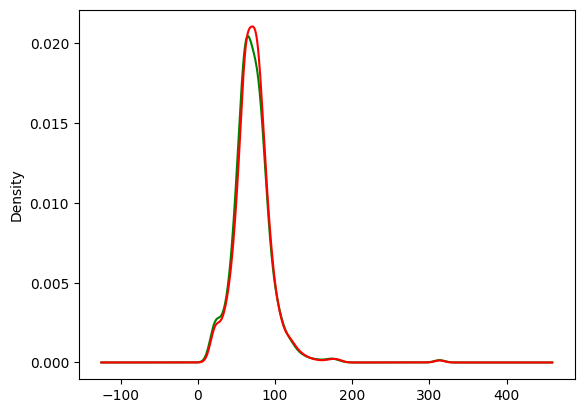

In [47]:
# Let see how changes to the most missing var, in distribution
X_train['LotFrontage'].plot(kind="kde", color="green")
train_imputed['LotFrontage'].plot(kind="kde", color="red")


With the same var and dataset, KNN imputation seems better than other techniques, right? But for the quality of the model, not sure?

### Automatically find best imputation parameters

We can optimize the parameters of the KNN imputation to better predict our outcome

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
# split data into train, test sets before any "learning"
X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use].drop('SalePrice', axis=1),
    data['SalePrice'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [50]:
pipeline = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=2000))
])

param_grid = {
    'imputer__n_neighbors': [3,5,10],
    'imputer__weights':['uniform', 'distance'],
    'imputer__add_indicator': [True, False],
    'regressor__alpha': [10, 100, 200]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1, 
    scoring='r2'
)

In [ ]:
grid_search.fit(X_train, y_train)

print("Best train score from grid search: %3.f"
      % grid_search.score(X_train, y_train))

print("Best test score from grid search: %3.f"
      % grid_search.score(X_test, y_test))

In [52]:
grid_search.best_params_

{'imputer__add_indicator': True,
 'imputer__n_neighbors': 3,
 'imputer__weights': 'distance',
 'regressor__alpha': 200}